In [2]:
# hourly data for potential uses.

import yfinance as yf

# gme = yf.Ticker("GME")
# gme.history(period="5mo", interval="1h")

In [6]:
# PLEASE CHANGE THE BELOW VARIABLES to train on different dataset. 
stock_data_input = 'mvis_stock_prices.csv'
ticker = 'MVIS'
reddit_posts_input = 'wallstreetbets_data.json'


In [9]:
# computer percentage change of stock price.

import pandas as pd
import numpy as np
from collections import OrderedDict

df = pd.read_csv(stock_data_input)

# WARNING: if you're testing on different stock prices, please re-calculate the shift on Dec 31. 
price_changes = [-2.18]

# price change = (cur - prev) * 100 / prev
prev = df['Adj Close'][0]
for cur in df['Adj Close'][1:]:
    change = round((cur - prev) * 100 / prev, 2)
    prev = cur
    price_changes.append(change)

df['change'] = price_changes

change_dict = OrderedDict()

change_dict['101'] = -2.18

for index, row in df.iterrows():
    dates = row['Date'].split('-')
    month = int(dates[1])
    day = int(dates[2])
    date_formatted = str(month)
    date_formatted += str(day).zfill(2)
    if date_formatted not in change_dict:
        change_dict[date_formatted] = row[-1]

print(change_dict)


OrderedDict([('101', -2.18), ('1231', -2.18), ('104', -3.16), ('105', 5.95), ('106', -5.25), ('107', 13.0), ('108', -0.17), ('111', -0.85), ('112', -4.27), ('113', 16.96), ('114', 0.76), ('115', 0.15), ('119', 6.66), ('120', -2.55), ('121', -1.16), ('122', -0.44), ('125', 7.25), ('126', 12.28), ('127', -8.72), ('128', -2.56), ('129', -1.8), ('201', 3.66), ('202', 3.53), ('203', 21.36), ('204', 11.56), ('205', 11.71), ('208', 27.56), ('209', 1.22), ('210', -6.04), ('211', 30.79), ('212', 0.11), ('216', 29.41), ('217', -16.74), ('218', -8.66), ('219', 13.64), ('222', -11.85), ('223', -10.4), ('224', 10.93), ('225', -9.91), ('226', -8.1), ('301', 18.29), ('302', -3.64), ('303', -9.38), ('304', -13.74), ('305', -3.25), ('308', -8.19), ('309', 19.63), ('310', 1.92), ('311', 3.34), ('312', 17.8), ('315', 2.06), ('316', -5.61), ('317', 3.62), ('318', -8.6), ('319', 8.85), ('322', 3.57), ('323', -11.96), ('324', -16.56), ('325', 6.14), ('326', -4.0), ('329', -9.81), ('330', 1.48), ('331', 50.6

In [11]:
# fill in the change percentage for non-trading days. 

month_dict = { '1':31, '2':28, '3':31, '4':30 }

for k, v in month_dict.items():
    for day in range(1, v + 1):
        date = int(k) * 100 + day
        cur_date = str(date)
        count = 31
        while str(date) not in change_dict and count > 0:
            date -= 1
            count -= 1
        if str(cur_date) not in change_dict:
            change_dict[cur_date] = change_dict[str(date)]

change_dict.pop('1231')

print(change_dict)

OrderedDict([('101', -2.18), ('104', -3.16), ('105', 5.95), ('106', -5.25), ('107', 13.0), ('108', -0.17), ('111', -0.85), ('112', -4.27), ('113', 16.96), ('114', 0.76), ('115', 0.15), ('119', 6.66), ('120', -2.55), ('121', -1.16), ('122', -0.44), ('125', 7.25), ('126', 12.28), ('127', -8.72), ('128', -2.56), ('129', -1.8), ('201', 3.66), ('202', 3.53), ('203', 21.36), ('204', 11.56), ('205', 11.71), ('208', 27.56), ('209', 1.22), ('210', -6.04), ('211', 30.79), ('212', 0.11), ('216', 29.41), ('217', -16.74), ('218', -8.66), ('219', 13.64), ('222', -11.85), ('223', -10.4), ('224', 10.93), ('225', -9.91), ('226', -8.1), ('301', 18.29), ('302', -3.64), ('303', -9.38), ('304', -13.74), ('305', -3.25), ('308', -8.19), ('309', 19.63), ('310', 1.92), ('311', 3.34), ('312', 17.8), ('315', 2.06), ('316', -5.61), ('317', 3.62), ('318', -8.6), ('319', 8.85), ('322', 3.57), ('323', -11.96), ('324', -16.56), ('325', 6.14), ('326', -4.0), ('329', -9.81), ('330', 1.48), ('331', 50.69), ('401', -16.2

In [12]:
# complete the data. Using the percentage obtained above as label

import json
from os import walk
import collections
from collections import OrderedDict

data = OrderedDict({'date':[], 'sentiment':[], 'upvote_ratio':[], 'total_awards_received':[], 'score':[], 'num_comments':[], 'change_pct':[], 'change':[]})

def processData(filename, ticker):
    name = "final_data/data/"+filename
    file = json.load(open(name))
    for date, value in file.items():
        if date == '501':
            continue
        for stock, reddits in value.items():
            # print("sentiment, upvote_ratio, total_awards_received, score, num_comments, link_flair_text")
            if stock != ticker:
                continue
            for post in reddits:
                # print(post)
                if "Loss" in post[-1]:
                    post[0] -= 1
                elif "Gain" in post[-1]:
                    post[0] += 1
                data['date'].append(int(date))
                data['sentiment'].append(float(post[0]))
                data['upvote_ratio'].append(float(post[1]))
                data['total_awards_received'].append(float(post[2]))
                data['score'].append(float(post[3]))
                data['num_comments'].append(float(post[4]))
#                 if date in change_dict:
#                     print("date is: " + date + ", pct is " + change_dict[date])
#                     data['change_pct'].append(change_dict[date])
#                 else:
#                     data['change_pct'].append(0)
                data['change_pct'].append(float(change_dict[date]))
                if change_dict[date] >= 0:
                    data['change'].append(int(1))
                else:
                    data['change'].append(int(0))

# change the stock ticker and input file name to load different data. 
processData(reddit_posts_input, ticker)

posts_data = pd.DataFrame(data)

posts_data

,date,sentiment,upvote_ratio,total_awards_received,score,num_comments,change_pct,change
0,112,1.0,0.50,0.0,0.0,1.0,-4.27,0
1,114,1.0,1.00,0.0,1.0,0.0,0.76,1
2,114,0.0,1.00,0.0,1.0,0.0,0.76,1
3,114,0.0,1.00,0.0,1.0,0.0,0.76,1
4,115,-1.0,0.33,0.0,0.0,1.0,0.15,1
...,...,...,...,...,...,...,...,...
1649,430,-1.0,1.00,0.0,1.0,1.0,-15.28,0
1650,430,0.0,1.00,0.0,1.0,0.0,-15.28,0
1651,430,2.0,1.00,0.0,1.0,0.0,-15.28,0
1652,430,1.0,1.00,0.0,1.0,0.0,-15.28,0


(1654, 8)


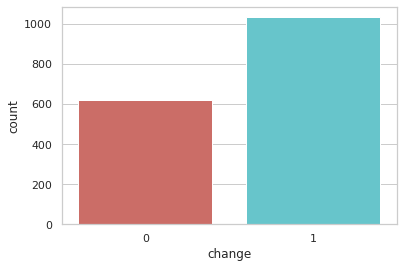

<Figure size 432x288 with 0 Axes>

In [13]:
# exploring the data and creating model. Using a simple log reg since we have a label here. 

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

posts_data.dropna()

print(posts_data.shape)

# exploring data
posts_data.value_counts()
sns.countplot(x='change', data=posts_data, palette='hls')
plt.show()
plt.savefig('count_plot')



In [14]:
count_decrease = len(posts_data[posts_data['change']==0])
count_increase = len(posts_data[posts_data['change']==1])
pct_of_decrease = count_decrease/(count_decrease+count_increase)
print("percentage of posts when stock price decrease is", pct_of_decrease*100)
pct_of_increase = count_increase/(count_decrease+count_increase)
print("percentage of posts when stock price increase is", pct_of_increase*100)

percentage of posts when stock price decrease is 37.48488512696493
percentage of posts when stock price increase is 62.515114873035074


In [15]:
posts_data.columns.values

X = posts_data.loc[:, posts_data.columns != 'change']
y = posts_data.loc[:, posts_data.columns == 'change']

# not oversampling and the model
# got LinAlgError: Singular matrix error, so attempt to drop some features and test
cols = ['sentiment', 'score', 'upvote_ratio', 'num_comments']
X=X[cols]
y=y['change']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

cols = ['score', 'upvote_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.659577
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.003    
Dependent Variable: change           AIC:              2189.8792
Date:               2021-05-05 13:55 BIC:              2211.5230
No. Observations:   1654             Log-Likelihood:   -1090.9  
Df Model:           3                LL-Null:          -1094.1  
Df Residuals:       1650             LLR p-value:      0.097189 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
sentiment      0.0983    0.0302   3.2503  0.0012   0.0390  0.1576
score          0.0004    0.0003   1.2506  0.2111  -0.0002  0.0010
upvote_r

In [16]:
# oversampling. 

from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=oversampling.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['change'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of posts when stock prices decreases in oversampled data",len(os_data_y[os_data_y['change']==0]))
print("Number of posts when stock prices increases",len(os_data_y[os_data_y['change']==1]))
print("Proportion of posts when stock prices decreases in oversampled data is ",len(os_data_y[os_data_y['change']==0])/len(os_data_X))
print("Proportion of posts when stock prices increases in oversampled data is ",len(os_data_y[os_data_y['change']==1])/len(os_data_X))

length of oversampled data is  1480
Number of posts when stock prices decreases in oversampled data 740
Number of posts when stock prices increases 740
Proportion of posts when stock prices decreases in oversampled data is  0.5
Proportion of posts when stock prices increases in oversampled data is  0.5


In [32]:
# env check utility, ignore if not needed. 

import imblearn; print("imblearn: ", imblearn.__version__)
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

imblearn:  0.8.0
Linux-4.19.104-microsoft-standard-x86_64-with-glibc2.28
Python 3.9.0 (default, Oct  6 2020, 19:10:42) 
[GCC 8.3.0]
NumPy 1.20.2
SciPy 1.6.3
Scikit-Learn 0.24.2


In [17]:
# recursive feature elimination. This is optional, as we have a rather small set of features and we believe all of them are important. 

data_final_vars=posts_data.columns.values.tolist()
y=['change']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


/home/yinuo/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
# got LinAlgError: Singular matrix error, so attempt to drop some features and test
cols = ['sentiment', 'score', 'upvote_ratio', 'num_comments']
X=os_data_X[cols]
y=os_data_y['change']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.688273
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.007    
Dependent Variable: change           AIC:              2045.2879
Date:               2021-05-05 13:56 BIC:              2066.4871
No. Observations:   1480             Log-Likelihood:   -1018.6  
Df Model:           3                LL-Null:          -1025.9  
Df Residuals:       1476             LLR p-value:      0.0023771
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
sentiment      0.1046    0.0291   3.5912  0.0003   0.0475  0.1617
score          0.0004    0.0003   1.4087  0.1589  -0.0002  0.0009
upvote_r

In [19]:
# the p-value for the variable score is < 0.05, so we will only keep this variable
cols = ['sentiment']
X=os_data_X[cols]
y=os_data_y['change']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.690087
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.004    
Dependent Variable: change           AIC:              2044.6561
Date:               2021-05-05 13:56 BIC:              2049.9559
No. Observations:   1480             Log-Likelihood:   -1021.3  
Df Model:           0                LL-Null:          -1025.9  
Df Residuals:       1479             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
sentiment    0.0724     0.0247   2.9340   0.0033   0.0240   0.1208



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# it doesn't seem like we can gain much insight from this data.  

Accuracy of logistic regression classifier on test set: 0.54
[[165  56]
 [149  74]]
              precision    recall  f1-score   support

           0       0.53      0.75      0.62       221
           1       0.57      0.33      0.42       223

    accuracy                           0.54       444
   macro avg       0.55      0.54      0.52       444
weighted avg       0.55      0.54      0.52       444

